   eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85


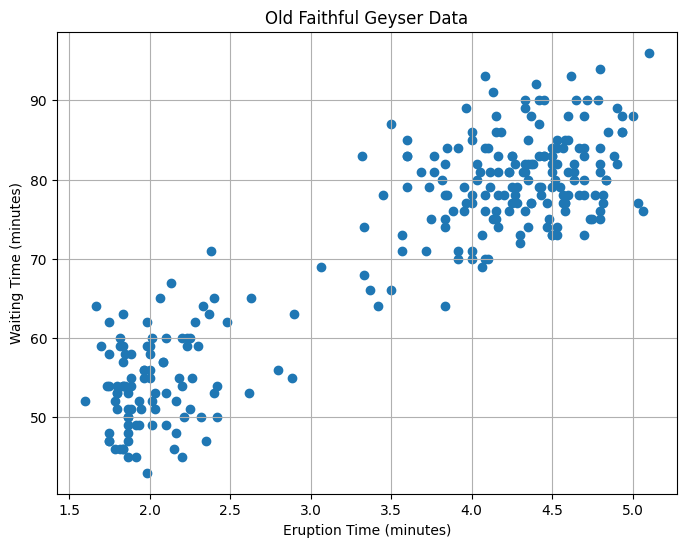

In [5]:
#Part (A) Create and print out a scatter plot of this dataset, eruption time versus waiting time.

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("faithful.csv")

# Display rows
print(df.head())

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['eruptions'], df['waiting'])
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('Old Faithful Geyser Data')
plt.grid(True)
plt.show()



B. How many clusters do you see based on your scatter plot? For the purposes of this question, a cluster is a “blob” of many data points that are close together, with regions of fewer data points between it and other “blobs”/clusters.

Ans. So here I can see 2 clusters, where one for shorter eruptions with shorter waits(minutes), and another for longer eruptions with longer waits (minutes).



C. Describe the steps of a hierarchical clustering algorithm. Based on your scatter plot, would this method be appropriate for this dataset? (10 points)

Ans. So here are the main steps:

1. I consider each data point as a separate cluster.

2. Then Compute all pairwise distances between clusters.

3. I then Merged the two closest clusters with each other .
I then repeat these steps until all points are merged until a desired number of clusters are formed.



And yes, hierarchical clustering could work because the data has clear groups and clusters. But I think k-means might be faster and better for this simple dataset with well-separated clusters in it.

In [5]:
#Part 2 A--Your source code for the k-means algorithm. You need to implement the algorithm from scratch.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("faithful.csv")
X = df[['eruptions', 'waiting']].values

# K-means from scratch
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def compute_loss(X, labels, centroids):
    return sum(np.linalg.norm(X[i] - centroids[labels[i]])**2 for i in range(len(X)))

def k_means(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    loss_history = []
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        centroids = update_centroids(X, labels, k)
        loss = compute_loss(X, labels, centroids)
        loss_history.append(loss)
    return labels, centroids, loss_history

# Run k-means
k = 2
labels, centroids, loss_history = k_means(X, k)


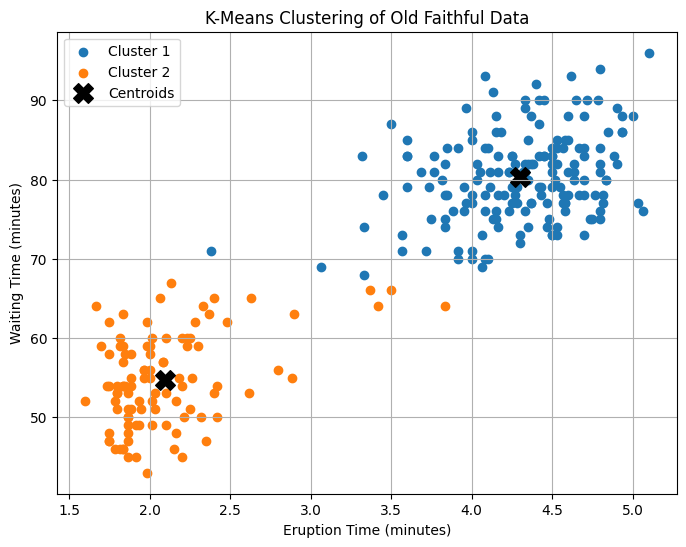

In [6]:
#B. A scatter plot of your final clustering, with the data points in each cluster color-coded, or plotted with different symbols. Include the cluster centers in your plot.
# Plot the clusters
plt.figure(figsize=(8,6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.title('K-Means Clustering of Old Faithful Data')
plt.legend()
plt.grid(True)
plt.show()



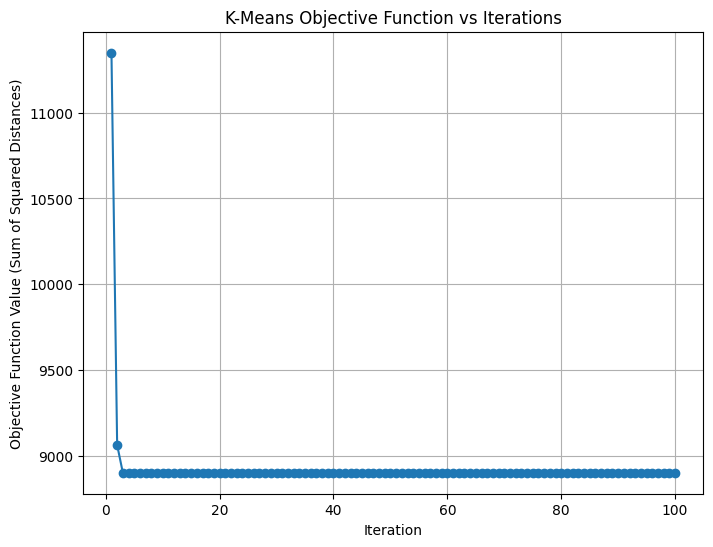

In [9]:
#C plot of the k-means objective function versus iterations of the algorithm. Recall that the objective function is
plt.figure(figsize=(8,6))
plt.plot(range(1, len(loss_history)+1), loss_history, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (Sum of Squared Distances)')
plt.grid(True)
plt.show()


#d) Did the method manage to find the clusters that you identified in Problem #1? If not, did it help to run the method again with another random #initialization?


So according to me, Yes, the k-means algorithm found the 2 clusters that we saw in Problem 1. The groups were clear and matched the two "blobs" we noticed in the scatter plot.

If the clusters did not look good at first, it can help to run the algorithm again with a different random start. We can also use a better method like k-means++ to choose starting points. In this case, setting "np.random.seed(42)" helped get good and consistent results